# ML Model Pipeline: Model-Building

**Predicting House Sale Price**

The aim of the project is to develop a machine learning model to predict house sale prices using features that describe various aspects of a house.

**Goals**

- To be able to understand the features that affect the price of houses in the Market.
- To determine the significant features on which the house price depend on.
- To develop a model that predicts the price of a house using the selected/important factors.

**Data Source:**
- Ames Housing dataset 
    - This dataset originates from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    
**Credits:**
- www.kaggle.com - This project wouldnt have been possible without Ames dataset from www.kaggle.com

# Import Libraries

In [1]:
#libs for data processing
import pandas as pd
import numpy as np

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#size plot/graph dimensions for matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

#Display all the columns
pd.pandas.set_option('display.max_columns',None)

#Display matplotlib output inline.
%matplotlib inline

#Model training
from sklearn.linear_model import Lasso

#suppress warnings
import warnings
warnings.simplefilter(action='ignore')

#Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#Serializing model using pickle
import pickle


# Read Data

In [2]:
try:
    X_train = pd.read_csv('my_Xtrain.csv')
    X_test = pd.read_csv('my_Xtest.csv')
    print(f'[SUCCESS] Done loading the dataset...')
    
except:
    print(f'Unable to load the dataset!')

[SUCCESS] Done loading the dataset...


##### Visualize the table/Dataframe

In [3]:
#Visualize the X_train table/Dataframe
X_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,908,0.176471,0.75,0.521833,0.426660,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.142857,0.666667,0.750,0.514706,0.327869,0.2,0.285714,0.714286,0.733333,0.25,0.0,0.666667,0.75,0.4,0.75,0.75,0.25,0.166667,0.039511,0.666667,0.0,0.339897,0.166448,1.0,0.75,1.0,1.0,0.422489,0.502179,0.0,0.643070,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.833333,0.654206,1.000000,0.25,0.126939,0.4,1.0,1.0,0.000000,0.000000,0.0,0.0,0.670833,0.0,0.0,0.75,0.5,0.0,0.454545,0.00,0.625,0.8,12.429216
1,783,0.000000,0.75,0.429425,0.494750,1.0,1.0,1.000000,0.333333,1.0,0.25,0.0,0.666667,0.375,0.571429,0.75,0.571429,0.666667,0.500,0.058824,0.131148,0.2,0.285714,0.785714,0.800000,0.25,0.0,0.666667,0.75,1.0,0.75,0.75,0.25,0.833333,0.000000,0.666667,0.0,0.604880,0.231260,1.0,1.00,1.0,1.0,0.550351,0.000000,0.0,0.514455,0.0,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.2,0.833333,0.074766,0.666667,0.50,0.426657,0.6,1.0,1.0,0.000000,0.060329,0.0,0.0,0.000000,0.0,0.0,0.75,0.5,0.0,0.454545,0.75,0.625,0.8,12.139399
2,953,0.382353,0.75,0.388581,0.335012,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.666667,0.375,0.571429,0.75,0.285714,0.444444,0.875,0.272059,0.114754,0.2,0.285714,0.285714,0.533333,0.25,0.0,0.333333,0.50,0.4,0.75,0.75,0.75,1.000000,0.116938,0.666667,0.0,0.046233,0.125696,1.0,0.75,1.0,1.0,0.315102,0.000000,0.0,0.294550,0.0,0.5,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.2,0.333333,0.327103,1.000000,0.25,0.279267,0.6,1.0,1.0,0.224037,0.000000,0.0,0.0,0.000000,0.0,0.0,0.50,0.5,0.0,0.272727,0.75,0.625,0.8,11.804849


In [4]:
#Visualize the X_train table/Dataframe
X_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,0.000000,0.75,0.445638,0.365508,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.250000,0.375,0.571429,0.75,0.571429,0.555556,0.875,0.316176,0.065574,0.8,0.285714,0.571429,0.533333,0.25,0.00000,0.333333,0.75,0.4,0.5,0.75,0.25,1.000000,0.117470,0.666667,0.0,0.169521,0.173322,1.0,0.50,1.0,1.0,0.439892,0.000000,0.0,0.411200,0.000000,0.5,0.333333,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.2,0.833333,0.401869,0.666667,0.25,0.186178,0.6,1.0,1.0,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.50,0.5,0.0,0.090909,0.0,0.625,0.8,11.947949
1,1106,0.235294,0.75,0.570180,0.439121,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.117647,0.262295,0.2,0.285714,0.571429,0.533333,0.50,0.22625,0.666667,0.75,1.0,1.0,0.75,0.75,1.000000,0.182849,0.666667,0.0,0.184503,0.239444,1.0,1.00,1.0,1.0,0.568437,0.543341,0.0,0.728921,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.583333,1.0,0.666667,0.6,0.833333,0.149533,0.666667,0.50,0.502116,0.6,1.0,1.0,0.217036,0.058501,0.000000,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.272727,1.0,0.625,0.8,12.691580
2,414,0.058824,0.25,0.363044,0.377814,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.208333,0.000,0.571429,0.75,0.571429,0.444444,0.625,0.610294,1.000000,0.2,0.285714,0.285714,0.466667,0.25,0.00000,0.333333,0.75,0.4,0.5,0.75,0.25,0.833333,0.000000,0.666667,0.0,0.431507,0.164975,1.0,0.75,1.0,0.5,0.425446,0.000000,0.0,0.397696,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.333333,0.8,0.333333,0.775701,0.333333,0.50,0.253879,0.6,1.0,1.0,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.181818,1.0,0.625,0.8,11.652687


##### Capture the dependent variable
- Recall: The dependent variable is log transformed.

In [5]:
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

##### Load Selected features from Feature selection phase

In [6]:
selected_features = pd.read_csv('selected_features.csv')
selected_features = selected_features['0'].to_list()#tolist() is used to convert a series to list
selected_features

['MSSubClass',
 'MSZoning',
 'LotArea',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtUnfSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'ScreenPorch',
 'Fence',
 'YrSold',
 'SaleCondition']

##### Reduce the X_train and X_test using  set the selected features

In [7]:
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(1314, 81)
X_test shape:(146, 81)


In [8]:
#Reduce the X_train and X_test using set the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [9]:
print(f'X_train shape:{X_train.shape}')
print(f'X_test shape:{X_test.shape}')

X_train shape:(1314, 43)
X_test shape:(146, 43)


In [10]:
print(f'Features have been reduced from 81 to {X_train.shape[1]}.')

Features have been reduced from 81 to 43.


# Build Model

Use the optimal value saved in Feature selection notebook.
The optimal values is 0.001.

In [11]:
#initialize model. 
lasso_mdl = Lasso(alpha=0.001, random_state=42)
#fit model
lasso_mdl.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

# Predicting using X_test dataset


In [12]:
#prediction 
preds = lasso_mdl.predict(X_test)

Text(0, 0.5, 'Predictions')

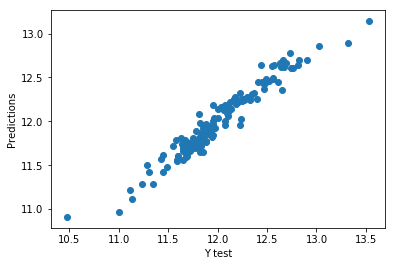

In [13]:
#create a scatterplot for real test values vs predicted values
plt.scatter(y_test, preds)
plt.xlabel('Y test')
plt.ylabel('Predictions')

There is a linear positive relationship between real test and predicted values.

# Evaluating the Model

In [14]:
# Recall:We log-transformed the dependent variable(SalePrice)in feature engineering notebook.
# To get the true performance of the Lasso, we need to transform both the target and the predictions back to the original house price values.

# make predictions for X_train dataset
preds_train = lasso_mdl.predict(X_train)
# determine mse, rmse, and r2 for the train dataset
print(f'Train set MSE : {int(mean_squared_error(np.exp(y_train), np.exp(preds_train)))}')
print(f'Train set RMSE : {int(sqrt(mean_squared_error(np.exp(y_train), np.exp(preds_train))))}')
print(f'Train set r2 : {r2_score(np.exp(y_train), np.exp(preds_train))}')
print('\n')

# make predictions for X_test dataset
preds_test = lasso_mdl.predict(X_test)
# determine mse, rmse, and r2  for the Test dataset
print(f'Test set MSE : {int(mean_squared_error(np.exp(y_test), np.exp(preds_test)))}')
print(f'Test set RMSE : {int(sqrt(mean_squared_error(np.exp(y_test), np.exp(preds_test))))}')
print(f'Test set r2 : {r2_score(np.exp(y_test), np.exp(preds_test))}')
print('\n')

#print median sale price for easier interpretation of RMSE.
print('Average house price: ', int(np.exp(y_train).median()))

Train set MSE : 768931738
Train set RMSE : 27729
Train set r2 : 0.8716712979694878


Test set MSE : 1133441758
Test set RMSE : 33666
Test set r2 : 0.8759454479510621


Average house price:  164500


# Residuals
 - evaluate the distribution of the residuals/errors.

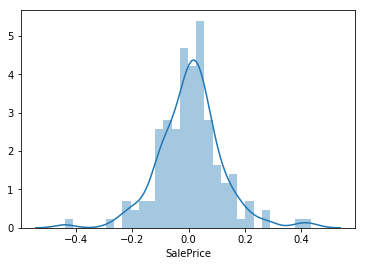

In [15]:
#plot histogram of residuals and ensure. For an ideal situation, the plot should be normally distributed
sns.distplot((y_test-preds_test),bins=30)

Residual plot above follows gaussian distributions and hence the lasso model prediction is "good".

# What are the coefficeints for the selected variable that were used for predictions.

In [16]:
#Create a df using coeeficeints
model_coefficients = pd.DataFrame(lasso_mdl.coef_,X_train.columns)
model_coefficients.columns = ['Coefficient']
model_coefficients

,Coefficient
MSSubClass,-0.057703
MSZoning,0.068977
LotArea,0.135992
LotShape,0.002412
LandContour,0.032720
LotConfig,0.016534
Neighborhood,0.243092
Condition1,0.031236
OverallQual,0.480689
OverallCond,0.243277


# Feature Importance

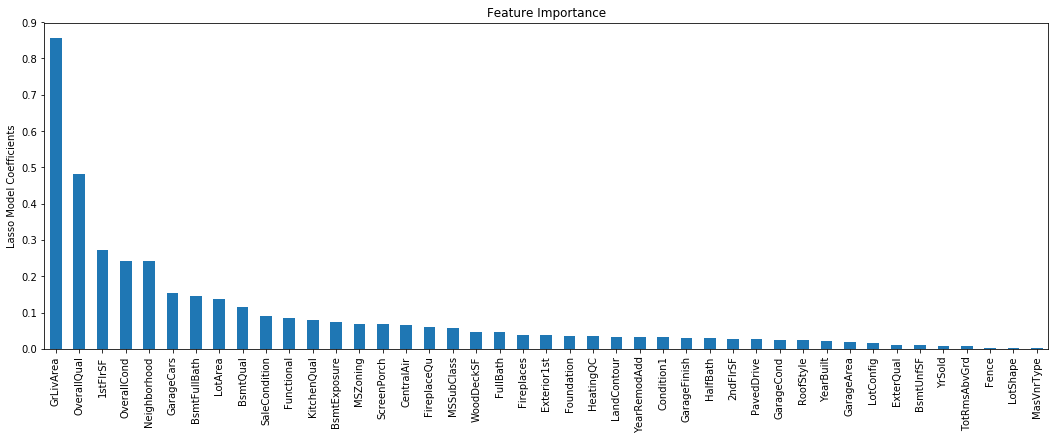

In [17]:
feat_importance = pd.Series(np.abs(lasso_mdl.coef_.ravel()))
feat_importance.index = selected_features
feat_importance.sort_values(inplace=True, ascending=False)
feat_importance.plot.bar(figsize=(18,6))
plt.ylabel('Lasso Model Coefficients')
plt.title('Feature Importance')
plt.show()

In [18]:
 print(f'GrLivArea and Foundation are the most and the least important features respectively.')

GrLivArea and Foundation are the most and the least important features respectively.


# Serialize/Save the Model

In [19]:
#serializing/saving model
model = pickle.dump(lasso_mdl, open('lasso_regression_model.pkl', 'wb'))